In [1]:
import random

random.seed(63428974)

def distance(p1, p2):
    return ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)**0.5


def get_mean(points):
    np = len(points)
    sump = [0,0]
    for p in points:
        sump[0] += p[0]
        sump[1] += p[1]
    sump[0] = sump[0]/np
    sump[1] = sump[1]/np
    return sump

def associate(centers, points, associated):
    nchanged = 0
    for ip, p in enumerate(points):
        closest = None
        mindist = 1e10
        for ic, c in enumerate(centers):
            dist = distance(p, c)
            if dist < mindist:
                mindist = dist
                closest = ic
        if closest is None: print("Something wrong. Look into associate function!")
        if associated[ip] != closest:
            associated[ip] = closest
            nchanged += 1
    return float(nchanged)/len(points)


def get_centroids(points, associated, kcls):
    center_points = [[] for _ in range(kcls)]
    for ip, p in enumerate(points):
        center_points[associated[ip]].append(p)
    centroids = []
    for icls in range(kcls):
        mean = get_mean(center_points[icls])
        centroids.append(mean)
    return centroids

def kmeans(points, kcls, max_iter=1000, min_shift_frac=0.01):
    
    npoints = len(points)
    if npoints <= kcls**2: kcls = int(npoints**0.5)
    
    centers = random.sample(points, kcls)
    associated = [0 for _ in points]
    for iter in range(max_iter):
        changed_fraction = associate(centers, points, associated)
        if changed_fraction <= min_shift_frac:
            print("changed_fraction({}) reached to min_shift_frac({})".format(changed_fraction, min_shift_frac))
            break
        if iter == max_iter-1:
            print("max_iter({}) reached.".format(iter))
    return associated

In [2]:
def generate_sample(ref_point, std, n):
    points = []
    for _ in range(n):
        p = [random.gauss(ref_point[0], std[0]), random.gauss(ref_point[1], std[1])]
        points.append(p)
    return points

p1 = [1,2]
p2 = [5,3]
p3 = [2,6]
data1 = generate_sample(p1, [0.8, 0.7], 30)
data2 = generate_sample(p2, [1.3, 1.5], 40)
data3 = generate_sample(p3, [1.0, 1.1], 30)
data = []
data = data + data1 + data2 + data3


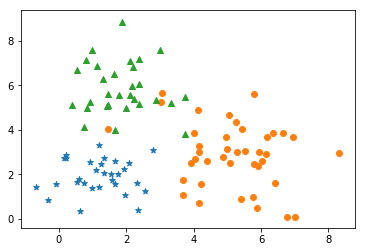

In [4]:
import matplotlib.pyplot as plt

plt.scatter([x[0] for x in data1], [x[1] for x in data1], marker="*")
plt.scatter([x[0] for x in data2], [x[1] for x in data2], marker="o")
plt.scatter([x[0] for x in data3], [x[1] for x in data3], marker="^")


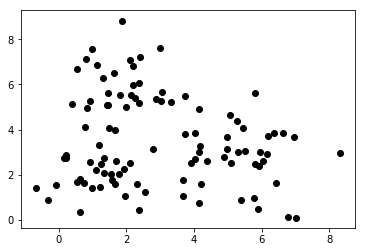

In [4]:
plt.scatter([x[0] for x in data], [x[1] for x in data], c="black", marker="o")

In [5]:
kcls = 3
associated = kmeans(data, kcls, max_iter=500, min_shift_frac=0.01)
centroids = get_centroids(data, associated, kcls)

changed_fraction(0.0) reached to min_shift_frac(0.01)


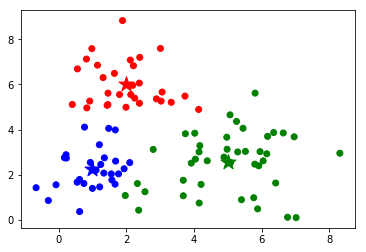

In [6]:
associated_colors = []
for a in associated:
    c = "black"
    if a == 0: c = "red"
    elif a == 1: c = "green"
    elif a == 2: c = "blue"
    associated_colors.append(c)
plt.scatter([x[0] for x in data], [x[1] for x in data], c=associated_colors, marker="o")
plt.scatter(centroids[0][0], centroids[0][1], s=250, c="red", marker="*")
plt.scatter(centroids[1][0], centroids[1][1], s=250, c="green", marker="*")
plt.scatter(centroids[2][0], centroids[2][1], s=250, c="blue", marker="*")
